In [1]:
import numpy as np
import pandas as pd
import pyflux as pf
import datetime as datetime
import matplotlib.pyplot as plt
import os
import pickle
%matplotlib inline
import seaborn as sns


In [2]:
# importing cv data
model_list = pickle.load(open('data/May_3_model_results', 'rb'))
model_list

[{'model_type': pyflux.arma.arma.ARIMA,
  'model_class': 'ARIMA',
  'name': 'Normal ARIMA(1,0,1)',
  'target': 'd_ten_y',
  'dep_vars': 'None',
  'hyper_params': {'ar': 1, 'ma': 1, 'diff_ord': 0},
  'num_components': 3,
  'forecast': array([[-1.75356616e-05, -2.64040499e-05, -2.75835923e-05, ...,
          -8.87585339e-06, -1.74658700e-06,  3.61426357e-06],
         [-1.75397732e-05, -1.83241584e-05, -5.47445690e-05, ...,
          -3.41548816e-05, -7.60271712e-06, -1.77657559e-05],
         [-1.75203649e-05, -1.81502360e-05, -5.57792224e-05, ...,
          -4.30770488e-05, -1.30795868e-05, -1.66695983e-05],
         ...,
         [-6.76471146e-06, -3.49406666e-05, -4.24448303e-05, ...,
          -1.68653992e-05, -2.23543637e-05, -9.86041451e-06],
         [-1.20429870e-05, -2.16869331e-05, -9.46064284e-06, ...,
           1.53091343e-05,  3.92154098e-06, -5.01496510e-06],
         [-1.82628223e-05, -7.62782474e-06, -9.27906947e-06, ...,
          -2.41785736e-05, -2.02547077e-05, -7.2

In [3]:
model_list[0]['forecast'].shape

(497, 7)

In [4]:
X_fwds_cv = pickle.load(open('data/fwd_cv_data', 'rb'))
X_fwds_cv.describe()

,six_m,one_y,two_y,three_y,five_y,seven_y,ten_y,d_six_m,d_one_y,d_two_y,d_three_y,d_five_y,d_seven_y,d_ten_y,ed_last,ed_avg_n,cos_last,cos_avg_n
count,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000
mean,0.003953,0.007129,0.011550,0.015855,0.021361,0.027189,0.026408,0.000016,0.000016,0.000014,0.000009,0.000011,0.000009,0.000008,0.052164,0.052164,0.028676,0.028676
std,0.002099,0.002214,0.002499,0.003531,0.004125,0.003965,0.003724,0.000196,0.000365,0.000551,0.000635,0.000621,0.000691,0.000575,0.218802,0.218802,0.121271,0.121271
min,0.000500,0.003403,0.007013,0.008720,0.013098,0.018210,0.018246,-0.000800,-0.001506,-0.002012,-0.002012,-0.002007,-0.002510,-0.001964,0.000000,0.000000,0.000000,0.000000
25%,0.002300,0.005307,0.009730,0.012542,0.017332,0.023634,0.023498,-0.000100,-0.000201,-0.000303,-0.000405,-0.000430,-0.000416,-0.000372,0.000000,0.000000,0.000000,0.000000
50%,0.004300,0.006913,0.010831,0.015981,0.021833,0.028220,0.027688,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.005000,0.008620,0.012951,0.018697,0.025047,0.030532,0.029433,0.000100,0.000201,0.000402,0.000503,0.000407,0.000469,0.000338,0.000000,0.000000,0.000000,0.000000
max,0.009300,0.012037,0.017684,0.022944,0.028853,0.034434,0.032752,0.001000,0.001708,0.001813,0.001816,0.002655,0.003046,0.002071,1.139397,1.139397,0.684546,0.684546


In [5]:
# loading up distributions of results
results = pickle.load(open("data/May_3_distrib", 'rb'))
results[0].shape


(497, 7)

In [45]:
col_headers = X_fwds_cv.columns[7:14]
col_headers

Index(['d_six_m', 'd_one_y', 'd_two_y', 'd_three_y', 'd_five_y', 'd_seven_y',
       'd_ten_y'],
      dtype='object')

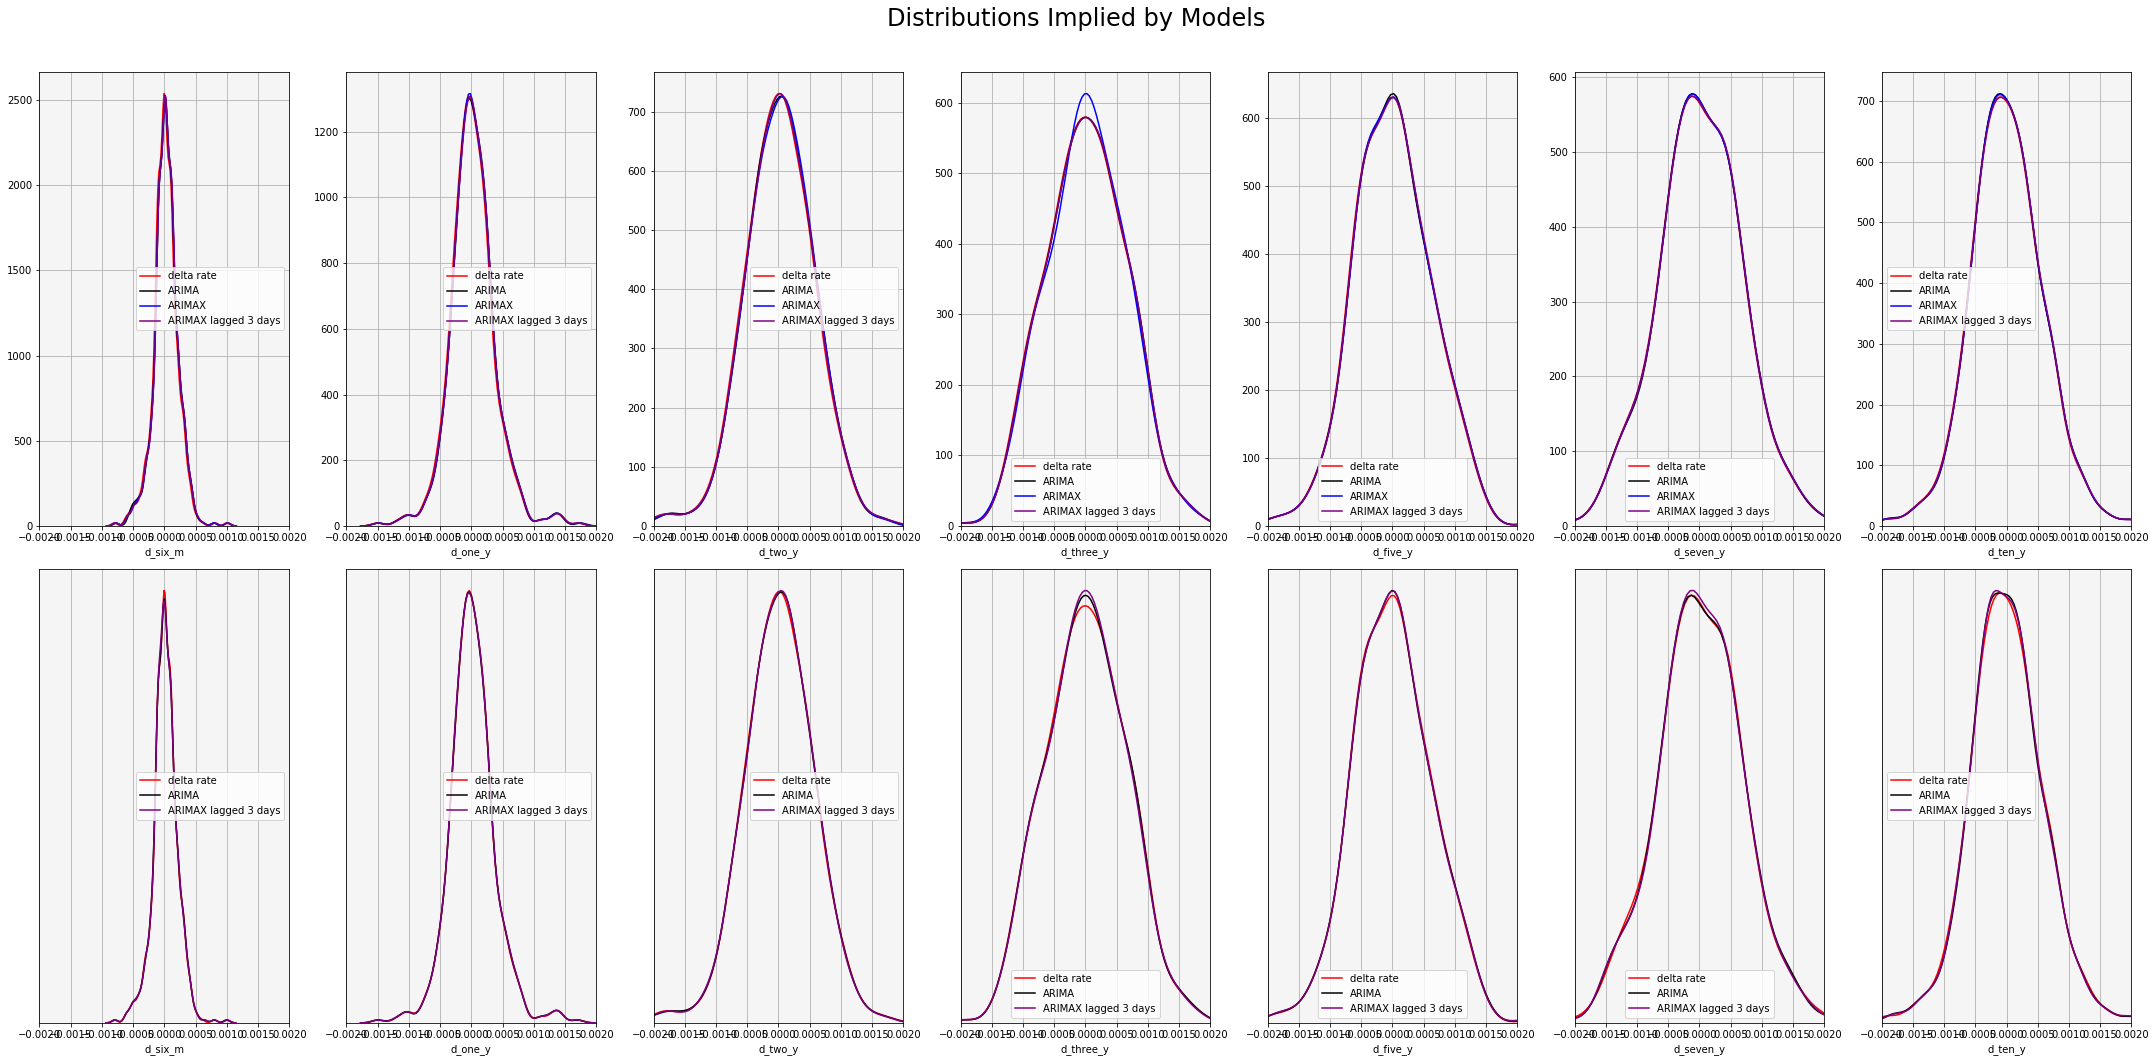

In [46]:
# Creating a chart of the overlapping distributions
#2 rows (non-pca and pca)
#7 columns
fig, axs = plt.subplots(2, 7, figsize = (30,15))
fig.suptitle('Distributions Implied by Models', fontsize=24)

for i, ax in enumerate(axs.flatten()):

    if i < 7:
        this_row = 0
        this_col = i
        sns.distplot(X_fwds_cv[col_headers[i]], label = 'delta rate', hist=False, 
                     norm_hist = True, kde=True,color = 'red', ax=axs[this_row,this_col])
        sns.distplot(results[0][:,this_col], label = 'ARIMA', hist=False,
                     norm_hist = True, kde=True,color = 'black', ax=axs[this_row,this_col])
        sns.distplot(results[1][:,this_col], label = 'ARIMAX', hist=False,
                     norm_hist = True, kde=True,color = 'blue', ax=axs[this_row,this_col])
        sns.distplot(results[2][:,this_col], label = 'ARIMAX lagged 3 days', 
                     hist=False, norm_hist = True, kde=True,color = 'purple', ax=axs[this_row,this_col])
        ax.grid()
        
        ax.set_xlim(left = -0.002, right = 0.002)
        
        ax.set_facecolor('whitesmoke')
    
    else:
        this_row = 1
        this_col = i-7
        
        sns.distplot(X_fwds_cv[col_headers[this_col]], label = 'delta rate', hist=False, color = 'red', ax=axs[this_row,this_col])
        sns.distplot(results[3][:,this_col], label = 'ARIMA', hist=False, color = 'black', ax=axs[this_row,this_col])
        sns.distplot(results[4][:,this_col], label = 'ARIMAX lagged 3 days', 
                     hist=False, color = 'purple', ax=axs[this_row,this_col])
        ax.set_yticks([])
        ax.set_xlim(left = -0.002, right = 0.002)
        
        ax.grid()
        ax.set_facecolor('whitesmoke')
    
    #axs[this_row,this_col].set_title('Distribution of Daily Changes in 6M Interest Rate')

#     this_name = model_list[this_column]['name']
#     this_title = this_name + ' forecast for ' + this_rate + ' forward'
#     #print(this_title)
#     ax.plot(these_dates, model_list[this_column]['forecast'][:,this_row])
#     start, end = ax.get_xlim()
#     ax.xaxis.set_ticks(np.arange(start, end, 250))
#     #ax.x_axis.set_ticks(x_tick_index)
#     ax.set_title(this_title)
#     ax.set_ylim(bottom=y_min, top=y_max)
#     ax.grid()
#     ax.set_facecolor('whitesmoke')
plt.tight_layout() 
fig.subplots_adjust(top = .92)
plt.savefig('initial_model_predictions.png')

In [8]:
model_list[0]['forecast'][:,0]

array([-1.75356616e-05, -1.75397732e-05, -1.75203649e-05, -2.25697671e-05,
       -7.44210756e-06, -2.27600390e-05, -2.73986715e-05, -1.72948858e-05,
       -1.75636494e-05, -3.45782331e-06, -2.27224530e-05, -1.23504717e-05,
       -2.25845193e-05, -1.22896912e-05, -1.75597544e-05, -2.22204043e-05,
       -2.73571051e-05, -1.96450724e-05, -2.24613415e-05, -2.45837213e-06,
       -1.78437072e-05, -1.74523936e-05, -1.74557681e-05, -1.74460005e-05,
       -1.24365198e-05, -1.75153101e-05, -1.63447841e-05, -2.23877546e-05,
       -1.22868152e-05, -2.24895519e-05, -2.22750162e-05, -1.23073836e-05,
       -2.25060216e-05, -1.22927219e-05, -1.51327003e-05, -1.74380423e-05,
       -2.38275610e-05, -2.72286233e-05, -1.21750503e-05, -2.20734366e-05,
       -1.73594120e-05, -1.23544725e-05, -1.74292792e-05, -1.22979324e-05,
       -2.23723850e-05,  2.79225583e-07, -1.74397333e-05, -1.42687429e-05,
       -1.21917212e-05, -1.72486821e-05, -2.21133021e-05, -2.70505737e-05,
       -3.20077586e-05, -

In [9]:
col_headers

Index(['d_six_m', 'd_one_y', 'd_two_y', 'd_three_y', 'd_five_y', 'd_seven_y',
       'd_ten_y'],
      dtype='object')

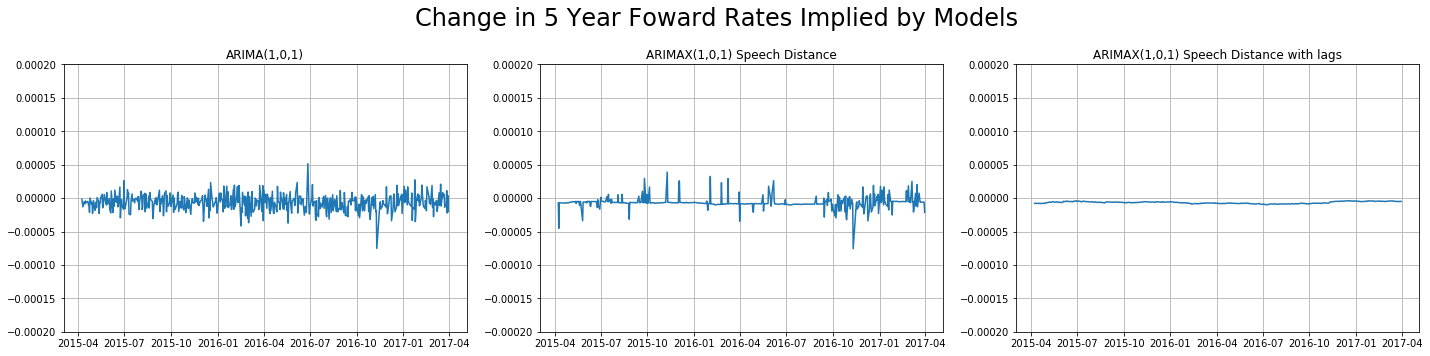

In [47]:
k = 5
# plotting the ARIMAX model forecasts
fig, axs = plt.subplots(1, 3, figsize = (20,5))
fig.suptitle('Change in 5 Year Foward Rates Implied by Models', fontsize=24)
axs[0].plot(X_fwds_cv.index, model_list[0]['forecast'][:,k])
axs[0].set_title('ARIMA(1,0,1)')
axs[0].set_ylim((-0.0002, 0.0002))

axs[0].grid()

axs[1].plot(X_fwds_cv.index, model_list[1]['forecast'][:,k])
axs[1].set_title('ARIMAX(1,0,1) Speech Distance')
#axs[1].plot(model_list[0]['forecast'][:,2])
#axs[0].set_ylim((-0.0002, 0.0002))

#axs[1].plot(model_list[0]['forecast'][:,2])
axs[1].set_ylim((-0.0002, 0.0002))

axs[1].grid()

axs[2].plot(X_fwds_cv.index, model_list[2]['forecast'][:,k])
axs[2].set_title('ARIMAX(1,0,1) Speech Distance with lags')
#axs[1].plot(model_list[0]['forecast'][:,2])
#axs[0].set_ylim((-0.0002, 0.0002))

#axs[1].plot(model_list[0]['forecast'][:,2])
axs[2].set_ylim((-0.0002, 0.0002))

axs[2].grid()

plt.tight_layout()
fig.subplots_adjust(top = .82)
plt.savefig('model_5_yr_fwds_forecast1.png')

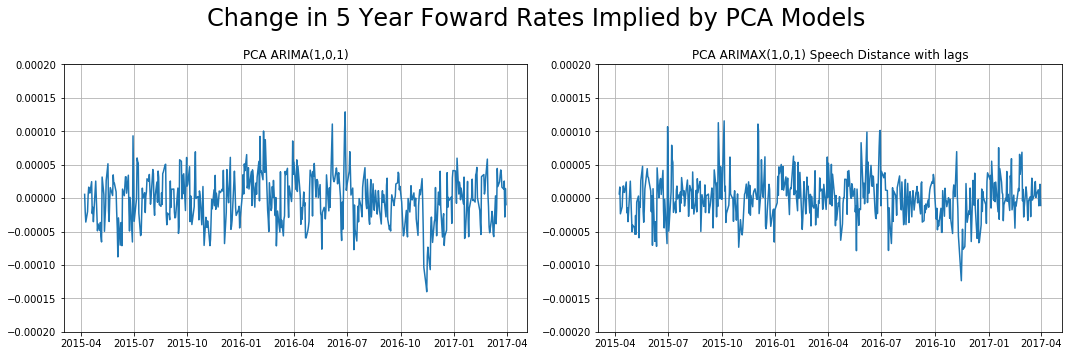

In [11]:
k = 4
# plotting the ARIMAX model forecasts
fig, axs = plt.subplots(1, 2, figsize = (15,5))
fig.suptitle('Change in 5 Year Foward Rates Implied by PCA Models', fontsize=24)
axs[0].plot(X_fwds_cv.index, model_list[3]['forecast'][:,k])
axs[0].set_title('PCA ARIMA(1,0,1)')
axs[0].set_ylim((-0.0002, 0.0002))

axs[0].grid()

axs[1].plot(X_fwds_cv.index, model_list[4]['forecast'][:,k])
axs[1].set_title('PCA ARIMAX(1,0,1) Speech Distance with lags')
#axs[1].plot(model_list[0]['forecast'][:,2])
#axs[0].set_ylim((-0.0002, 0.0002))

#axs[1].plot(model_list[0]['forecast'][:,2])
axs[1].set_ylim((-0.0002, 0.0002))

axs[1].grid()

# axs[2].plot(X_fwds_cv.index, model_list[2]['forecast'][:,k])
# axs[2].set_title('ARIMAX(1,0,1) Speech Distance with lags')
# #axs[1].plot(model_list[0]['forecast'][:,2])
# #axs[0].set_ylim((-0.0002, 0.0002))

# #axs[1].plot(model_list[0]['forecast'][:,2])
# axs[2].set_ylim((-0.0002, 0.0002))

# axs[2].grid()

plt.tight_layout()
fig.subplots_adjust(top = .82)
plt.savefig('model_5_yr_fwds_forecast2.png')

In [13]:
model_list[4]

{'model_type': pyflux.arma.arimax.ARIMAX,
 'model_class': 'ARIMAX',
 'name': 'Normal ARIMAX(1,0,1)',
 'target': 'PCA',
 'dep_vars': 'ed_last',
 'hyper_params': {'ar': 1, 'ma': 1, 'diff_ord': 0},
 'num_components': 3,
 'formula': 'd_ten_y~1+ed_last',
 'forecast': array([[ 3.49442617e-06,  1.61325293e-05,  4.35395068e-05, ...,
          6.24171717e-06, -3.65458218e-05,  8.44240570e-06],
        [ 2.49129612e-05,  1.02651119e-05, -2.75755555e-05, ...,
          1.65783471e-05,  8.76880937e-05, -5.99839753e-05],
        [-6.91341419e-07, -9.57331181e-06, -3.15005049e-05, ...,
         -2.35271472e-05, -1.71243596e-06, -2.87459907e-05],
        ...,
        [-1.84656145e-05, -3.17294115e-06,  4.40615775e-05, ...,
         -2.97571974e-06, -7.26521906e-05,  3.57807349e-05],
        [-1.48318455e-05, -2.53491652e-07,  4.58469560e-05, ...,
          2.06605820e-05, -3.26138308e-05,  5.20147397e-05],
        [-5.64925078e-06, -4.64026344e-06, -4.08530101e-07, ...,
         -1.09967511e-05, -2.2

In [14]:
these_dates = X_fwds_cv.index

In [15]:
these_dates

DatetimeIndex(['2015-04-08', '2015-04-09', '2015-04-10', '2015-04-13',
               '2015-04-14', '2015-04-15', '2015-04-16', '2015-04-17',
               '2015-04-20', '2015-04-21',
               ...
               '2017-03-20', '2017-03-21', '2017-03-22', '2017-03-23',
               '2017-03-24', '2017-03-27', '2017-03-28', '2017-03-29',
               '2017-03-30', '2017-03-31'],
              dtype='datetime64[ns]', name='Date', length=497, freq=None)

In [16]:
model_list[0]['forecast'].shape

(497, 7)

In [59]:
whos

Variable      Type             Data/Info
----------------------------------------
X_fwds_cv     DataFrame                     six_m     on<...>\n[489 rows x 20 columns]
ax            AxesSubplot      AxesSubplot(0.872788,0.0395428;0.115644x0.420344)
axs           ndarray          3: 3 elems, type `object`, 24 bytes
col_headers   Index            Index(['d_six_m', 'd_one_<...>],\n      dtype='object')
datetime      module           <module 'datetime' from '<...>b/python3.6/datetime.py'>
fig           Figure           Figure(1440x360)
i             int              13
k             int              4
model_list    list             n=5
np            module           <module 'numpy' from '/an<...>kages/numpy/__init__.py'>
os            module           <module 'os' from '/anaco<...>da3/lib/python3.6/os.py'>
pd            module           <module 'pandas' from '/a<...>ages/pandas/__init__.py'>
pf            module           <module 'pyflux' from '/a<...>ages/pyflux/__init__.py'>
pickle     

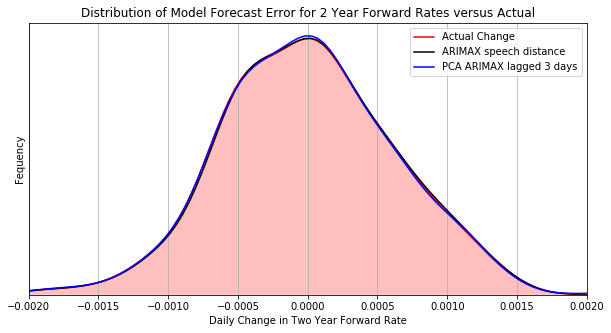

In [48]:
'''
NOW I AM BUILDING A CHART OF THE FIVE YEAR ACTUAL CHANGES VERSUS MODEL CHANGES
Actual changes sit in X_fwds_cv
Model changes sit in results[0-5][numpy array]

NEED TO MAKE THESE SMALLER AND DROP THE yLABELS
'''
k = 4
fig, axs = plt.subplots(1,1,figsize=(10,5))
sns.distplot(X_fwds_cv[col_headers[k]], label = 'Actual Change', kde_kws={'shade': True}, hist=False, color = 'red')
#sns.distplot(results[0][:,k], label = 'ARIMA(1,0,1)', hist=False, color = 'black')
sns.distplot(results[1][:,k], label = 'ARIMAX speech distance', 
                     hist=False, color = 'black')
# sns.distplot(results[2][:,k], label = 'ARIMAX speech distance lagged 3 days', 
#                      hist=False, color = 'black')
#sns.distplot(results[3][:,k], label = 'PCA ARIMA', 
                     #hist=False, color = 'purple')
sns.distplot(results[4][:,k], label = 'PCA ARIMAX lagged 3 days', 
                     hist=False, color = 'blue')
axs.set_title('Distribution of Model Forecast Error for 2 Year Forward Rates versus Actual')
axs.grid()
plt.ylabel('Fequency')
plt.xlabel("Daily Change in Two Year Forward Rate")
ax.set_facecolor('whitesmoke')
axs.set_yticks([])
axs.set_xlim(left = -0.002, right = 0.002)
plt.savefig('model_2_yr_fwds_forecast.png')

(-0.002, 0.002)

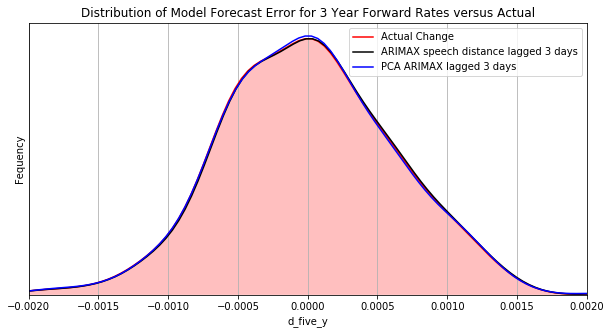

In [49]:

k = 4
fig, axs = plt.subplots(1,1,figsize=(10,5))
sns.distplot(X_fwds_cv[col_headers[k]], label = 'Actual Change', kde_kws={'shade': True}, hist=False, color = 'red')
#sns.distplot(results[0][:,k], label = 'ARIMA(1,0,1)', hist=False, color = 'black')
#sns.distplot(results[1][:,k], label = 'ARIMAX speech distance', 
#                     hist=False, color = 'black')
sns.distplot(results[2][:,k], label = 'ARIMAX speech distance lagged 3 days', 
                     hist=False, color = 'black')
#sns.distplot(results[3][:,k], label = 'PCA ARIMA', 
                     #hist=False, color = 'purple')
sns.distplot(results[4][:,k], label = 'PCA ARIMAX lagged 3 days', 
                     hist=False, color = 'blue')
axs.set_title('Distribution of Model Forecast Error for 3 Year Forward Rates versus Actual')
axs.grid()
plt.ylabel('Fequency')
axs.set_yticks([])
axs.set_xlim(left = -0.002, right = 0.002)

# print("Mean of daily changes in 3 year forward rate       : {0:2.7f}".format(np.mean(X_fwds_cv[col_headers[k]])))
# print("Mean of ARIMAX model changes in 3 year forward rate: {0:2.7f}".format(np.mean(results[1][:,k])))
# print("Mean of daily changes in 3 year forward rate       : {0:2.7f}".format(np.mean(X_fwds_cv[col_headers[k]])))

In [118]:
np.mean(X_fwds_cv[col_headers[k]])

4.718794208037338e-06

In [100]:
'''
One more thing to do in apartment
Check how this model predicts only on the day after a speech!
'''

X_fwds_cv.describe()

,six_m,one_y,two_y,three_y,five_y,seven_y,ten_y,d_six_m,d_one_y,d_two_y,d_three_y,d_five_y,d_seven_y,d_ten_y,ed_last,ed_avg_n,cos_last,cos_avg_n,ed_last_l1,ed_last_l2
count,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,4.890000e+02,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000
mean,0.004141,0.007312,0.011697,0.015925,0.021423,0.027262,0.026463,0.000018,0.000014,0.000012,0.000005,0.000003,0.000001,8.222810e-07,0.168447,0.168550,0.032424,0.032318,0.168447,0.168447
std,0.002151,0.002213,0.002499,0.003584,0.004184,0.003997,0.003762,0.000197,0.000368,0.000555,0.000634,0.000623,0.000690,5.743519e-04,0.423652,0.423877,0.084750,0.084287,0.423652,0.423652
min,0.000500,0.003403,0.007013,0.008720,0.013098,0.018210,0.018246,-0.000800,-0.001506,-0.002012,-0.002012,-0.002007,-0.002510,-1.963840e-03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.002600,0.005510,0.009926,0.012542,0.017283,0.023585,0.023402,-0.000100,-0.000201,-0.000303,-0.000405,-0.000455,-0.000416,-3.718279e-04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.004300,0.007114,0.010835,0.016181,0.022161,0.028600,0.028019,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-8.430341e-06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.005100,0.008721,0.013353,0.018902,0.025135,0.030604,0.029457,0.000100,0.000201,0.000402,0.000405,0.000404,0.000456,3.371911e-04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.009700,0.012137,0.017684,0.022944,0.028853,0.034434,0.032752,0.001000,0.001708,0.001813,0.001816,0.002655,0.003046,2.070701e-03,1.330989,1.326005,0.373948,0.373948,1.330989,1.330989


In [50]:
my_list = list(np.where(X_fwds_cv['ed_last']!=0))
my_list

[array([  0,  32,  38,  58,  65, 118, 124, 148, 163, 164, 204, 219, 228,
        243, 285, 290, 291, 307, 349, 359, 397, 444, 445, 446, 469, 474,
        476])]

In [51]:
for i in range(len(my_list)):
    my_list[i] = my_list[i]+1
my_list

[array([  1,  33,  39,  59,  66, 119, 125, 149, 164, 165, 205, 220, 229,
        244, 286, 291, 292, 308, 350, 360, 398, 445, 446, 447, 470, 475,
        477])]

In [84]:
k=2
list_act = []
list_model = []
for item in my_list:
    
    this_act = X_fwds_cv['d_two_y'].iloc[item]
    list_act.append(this_act)
    this_model =results[1][item,k]
    list_model.append(this_model)

    #print(my_list[i])

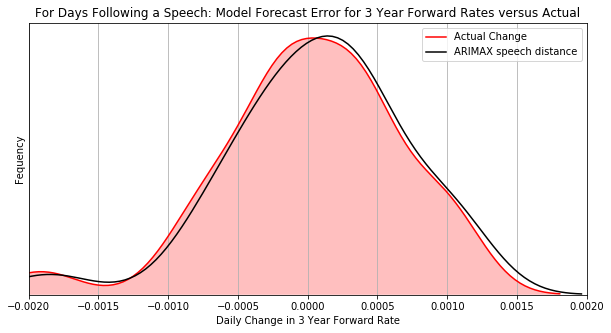

In [85]:

fig, axs= plt.subplots(1,1,figsize=(10,5))
sns.distplot(list_act, label = 'Actual Change', kde_kws={'shade': True}, hist=False, color = 'red')
#sns.distplot(results[0][:,k], label = 'ARIMA(1,0,1)', hist=False, color = 'black')
#sns.distplot(results[1][:,k], label = 'ARIMAX speech distance', 
#                     hist=False, color = 'black')
sns.distplot(list_model, label = 'ARIMAX speech distance', 
                     hist=False, color = 'black')
#sns.distplot(results[3][:,k], label = 'PCA ARIMA', 
                     #hist=False, color = 'purple')
#sns.distplot(results[4][:,k], label = 'PCA ARIMAX lagged 3 days', 
#                     hist=False, color = 'blue')
axs.set_title('For Days Following a Speech: Model Forecast Error for 3 Year Forward Rates versus Actual')
axs.grid()
plt.ylabel('Fequency')
plt.xlabel('Daily Change in 3 Year Forward Rate')
axs.set_yticks([])
axs.set_xlim(left = -0.002, right = 0.002)
ax.set_facecolor('whitesmoke')
plt.savefig('Only_speech_days.png')

In [44]:
results


[array([[ 1.75356616e-05,  2.64040499e-05,  4.29946664e-04, ...,
          6.16888082e-04, -5.04218346e-05,  5.71192064e-04],
        [ 1.75397732e-05,  1.83241584e-05,  4.57228036e-04, ...,
          8.69957284e-04,  5.24179123e-04,  5.34284817e-04],
        [-8.24796351e-05,  5.19468559e-04,  5.54324359e-05, ...,
         -8.42504156e-06, -2.77242295e-04, -3.32022101e-04],
        ...,
        [ 6.76471146e-06,  2.36205864e-04, -8.65787540e-04, ...,
         -5.66381395e-04, -3.93756665e-04, -3.33118856e-05],
        [-8.79570130e-05, -7.88905669e-05,  5.14010835e-04, ...,
          4.66638914e-04,  6.67263403e-04,  4.81872652e-05],
        [ 1.82628223e-05,  7.62782474e-06, -1.92516901e-04, ...,
          3.72488338e-07, -2.58754715e-04,  7.56264005e-05]]),
 array([[ 1.85506780e-05,  1.84896511e-05,  4.28887463e-04, ...,
          6.16053175e-04, -4.48639931e-05,  5.71005773e-04],
        [ 1.26642425e-05, -3.47996147e-05,  4.98283832e-04, ...,
          8.69388579e-04,  5.61770435e

In [43]:
this_model


array([ 8.45442045e-04, -4.73815307e-04,  1.30271357e-03,  7.41935146e-04,
        4.64230556e-04,  5.65824107e-04,  9.45773826e-04, -9.57179708e-05,
        4.13016814e-04,  2.24023390e-03, -1.32934657e-03, -4.95157865e-04,
       -1.43128399e-03, -2.92880249e-04,  5.65330258e-04,  2.11826144e-04,
       -4.95301561e-04,  3.38476913e-04, -6.45555658e-04,  8.43174334e-04,
        6.65895239e-04,  9.43451927e-04,  7.42520168e-04, -4.37572935e-05,
       -5.00142899e-04,  5.64178179e-04, -1.46955776e-04])

In [124]:
# find the rows in this mess and add one to each. Use this index to build a kde of
# changes in rates versus models for the same index                            

In [30]:
whos

Variable      Type             Data/Info
----------------------------------------
X_fwds_cv     DataFrame                     six_m     on<...>\n[497 rows x 18 columns]
ax            AxesSubplot      AxesSubplot(0.872788,0.0395428;0.115644x0.420344)
axs           AxesSubplot      AxesSubplot(0.125,0.125;0.775x0.755)
col_headers   Index            Index(['d_six_m', 'd_one_<...>],\n      dtype='object')
datetime      module           <module 'datetime' from '<...>b/python3.6/datetime.py'>
fig           Figure           Figure(720x360)
i             int              0
item          ndarray          27: 27 elems, type `int64`, 216 bytes
k             int              5
list_act      list             n=1
list_model    list             n=1
model_list    list             n=6
my_list       list             n=1
np            module           <module 'numpy' from '/an<...>kages/numpy/__init__.py'>
os            module           <module 'os' from '/anaco<...>da3/lib/python3.6/os.py'>
pd          

In [31]:
X_fwds_cv.head()


,six_m,one_y,two_y,three_y,five_y,seven_y,ten_y,d_six_m,d_one_y,d_two_y,d_three_y,d_five_y,d_seven_y,d_ten_y,ed_last,ed_avg_n,cos_last,cos_avg_n
Date,,,,,,,,,,,,,,,,,,
2015-04-08,0.0010,0.003404,0.008825,0.015172,0.021082,0.025724,0.025482,0.0000,0.000000,4.023631e-04,-0.000102,0.000608,-0.000052,0.000575,1.099217,1.099217,0.38659,0.38659
2015-04-09,0.0010,0.003404,0.009227,0.015677,0.021918,0.026240,0.025999,0.0000,0.000000,4.024835e-04,0.000505,0.000836,0.000517,0.000517,0.000000,0.000000,0.00000,0.00000
2015-04-10,0.0009,0.003905,0.009227,0.016081,0.021867,0.025950,0.025650,-0.0001,0.000501,-3.467865e-07,0.000404,-0.000052,-0.000290,-0.000349,0.000000,0.000000,0.00000,0.00000
2015-04-13,0.0011,0.003504,0.008724,0.016082,0.021411,0.026002,0.025448,0.0002,-0.000401,-5.029008e-04,0.000001,-0.000456,0.000052,-0.000203,0.000000,0.000000,0.00000,0.00000
2015-04-14,0.0010,0.003604,0.008523,0.015072,0.020981,0.025622,0.025009,-0.0001,0.000100,-2.011765e-04,-0.001011,-0.000430,-0.000380,-0.000439,0.000000,0.000000,0.00000,0.00000


In [33]:
k

5